In [1]:
import pandas as pd
import numpy as np

from glob import glob
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [4]:
#annot = pd.read_parquet('../input/textocr-text-extraction-from-images-dataset/annot.parquet')
#imgs = pd.read_parquet('../input/textocr-text-extraction-from-images-dataset/img.parquet')
img_fns = glob(r'C:\Users\caretaker\Documents\hakaton\hak2023\Data\zn\images\*')

In [5]:
img_fns

['C:\\Users\\caretaker\\Documents\\hakaton\\hak2023\\Data\\zn\\images\\017619a5-e33a-4351-a695-0d04da4519b8.png',
 'C:\\Users\\caretaker\\Documents\\hakaton\\hak2023\\Data\\zn\\images\\04c3357a-3cee-43a1-824b-b1151e6d6404.jpg',
 'C:\\Users\\caretaker\\Documents\\hakaton\\hak2023\\Data\\zn\\images\\0578d9d6-0353-4a1c-9fad-91e1f2d9864e.png',
 'C:\\Users\\caretaker\\Documents\\hakaton\\hak2023\\Data\\zn\\images\\06173a6f-a7a6-4313-af95-5affed21df31.png',
 'C:\\Users\\caretaker\\Documents\\hakaton\\hak2023\\Data\\zn\\images\\0967ba80-8a20-4a30-94e5-3a52b0a451b4.jpg',
 'C:\\Users\\caretaker\\Documents\\hakaton\\hak2023\\Data\\zn\\images\\0cdea12d-b73c-40cb-a5ee-3ae985ce862d.png',
 'C:\\Users\\caretaker\\Documents\\hakaton\\hak2023\\Data\\zn\\images\\0f00d72f-cf11-45d2-8051-2611bcbde777.png',
 'C:\\Users\\caretaker\\Documents\\hakaton\\hak2023\\Data\\zn\\images\\16066bfa-3ce1-4a54-a944-5beb0bae6f1b.png',
 'C:\\Users\\caretaker\\Documents\\hakaton\\hak2023\\Data\\zn\\images\\1a114fb6-9546-408

In [94]:
# fig, axs = plt.subplots(5, 5, figsize=(20, 20))
# axs = axs.flatten()
# for i in range(25):
#     axs[i].imshow(plt.imread(img_fns[i]))
#     axs[i].axis('off')
#     axs[i].set_title(img_fns[i].split('/')[-1])
# plt.show()

In [6]:
import easyocr

reader = easyocr.Reader(['ru'], gpu = True)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

SyntaxError: not a PNG file (<string>)

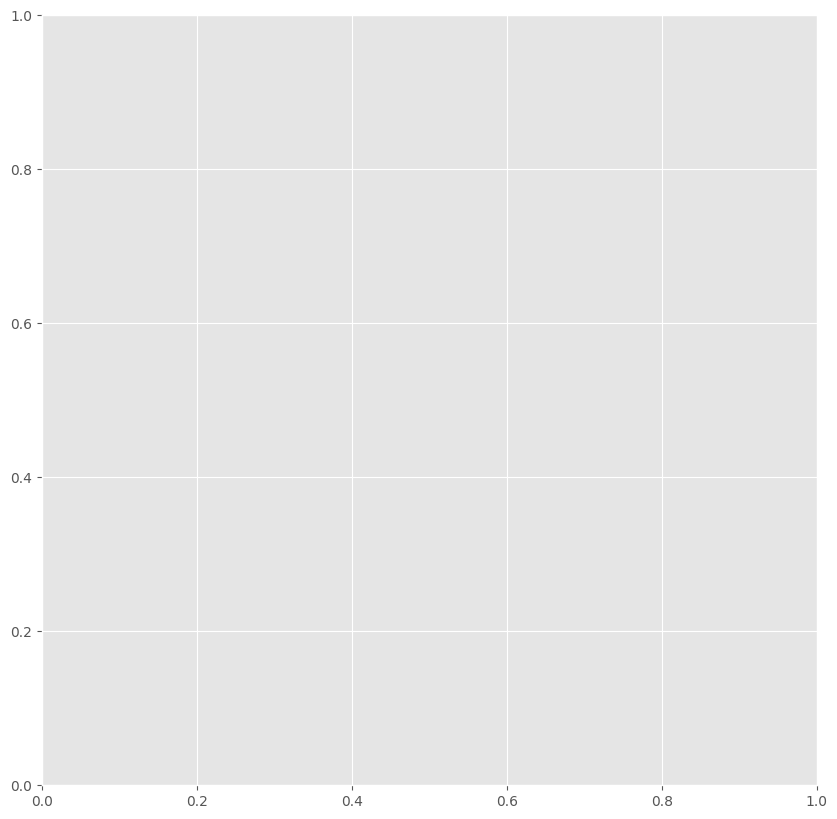

In [7]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

detects = reader.detect(img_fns[0])[0][0]

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(plt.imread(img_fns[0]))
ax.axis('off')

for i in range(len(detects)):
    plt.gca().add_patch(Rectangle((detects[i][0],detects[i][2]),
                                detects[i][1] - detects[i][0],
                                detects[i][3] - detects[i][2],
                                edgecolor='red',
                                facecolor='none',
                                lw= 1 ))

plt.show()

In [97]:
results = reader.readtext(img_fns[0])

pd.DataFrame(results, columns=['bbox','text','conf'])

,bbox,text,conf
0,"[[50, 14], [190, 14], [190, 44], [50, 44]]",Дзен-студия,0.881214
1,"[[222, 62], [370, 62], [370, 86], [222, 86]]",Статистика,0.999983
2,"[[61, 93], [127, 93], [127, 109], [61, 109]]",Главное,0.999999
3,"[[236, 118], [333, 118], [333, 138], [236, 138]]",Подписчики,0.999961
4,"[[375, 119], [471, 119], [471, 137], [375, 137]]",Публикации,0.999988
5,"[[513, 119], [679, 119], [679, 135], [513, 135]]",Почасовая статистика,0.948187
6,"[[721, 119], [771, 119], [771, 137], [721, 137]]",Доход,0.999994
7,"[[813, 119], [895, 119], [895, 137], [813, 137]]",Аудитория,1.000000
8,"[[1402, 113], [1471, 113], [1471, 139], [1402,...",30 дней,0.999975
9,"[[24, 136], [52, 136], [52, 164], [24, 164]]",'],0.402005
